In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_4_data_cleaned.csv",index_col = 0)
df.head()

height  length  area  eccen  p_black  p_and  mean_tr  blackpix  blackand  \
0     5.0       7    35  1.400    0.400  0.657     2.33        14      23.0   
1     6.0       7    42  1.167    0.429  0.881     3.60        18      37.0   
2     6.0      18   108  3.000    0.287  0.741     4.43        31      80.0   
3     5.0       7    35  1.400    0.371  0.743     4.33        13      26.0   
4     6.0       3    18  0.500    0.500  0.944     2.25         9      17.0   

   wb_trans  y  
0       6.0  1  
1       5.0  1  
2       7.0  1  
3       3.0  1  
4       4.0  1

In [3]:
df1 = df.iloc[:,:-1]
X = df1
y = df['y']

col = X.columns

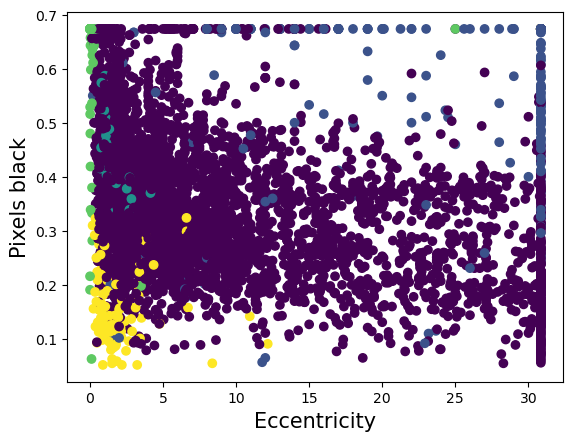

In [4]:
# 2D plot for 2 features from the dataset
import matplotlib.pyplot as plt
plt.scatter(df1['eccen'], df1['p_black'],c=y)
plt.xlabel('Eccentricity', fontsize=15)
plt.ylabel('Pixels black', fontsize=15);
plt.show()

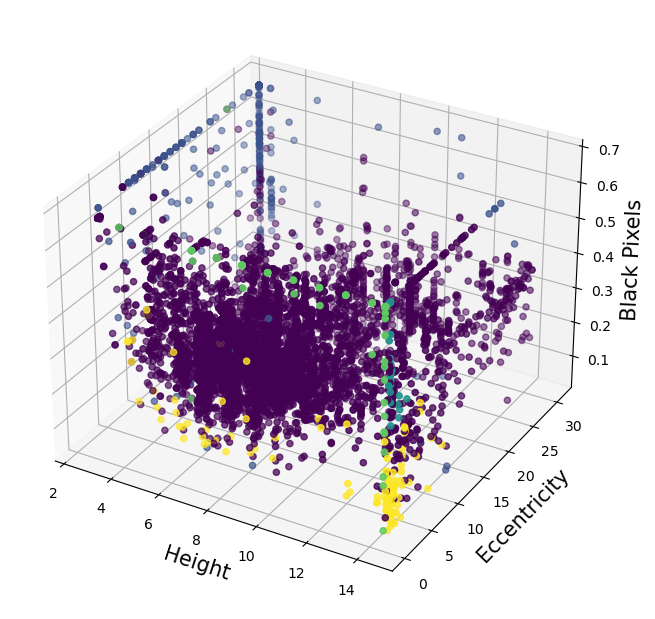

In [5]:
# 3D plot for 3 features from the dataset
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(df1['height'], df1['eccen'], df1['p_black'], c=y)
ax.set_xlabel('Height', fontsize=15)
ax.set_ylabel('Eccentricity', fontsize=15)
ax.set_zlabel('Black Pixels', fontsize=15)
plt.show()

In [6]:
! pip install plotly

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

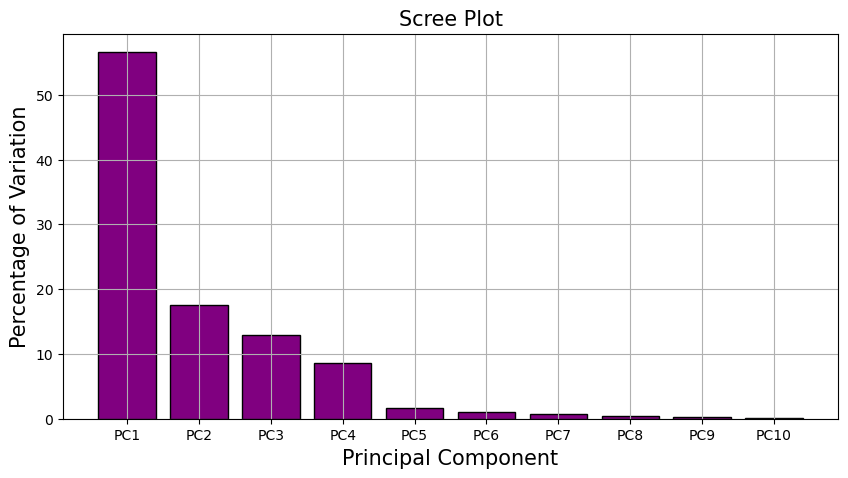

In [8]:
pca_data = PCA(n_components=10,random_state=0)
pca_data.fit(X)
per_var = np.round(pca_data.explained_variance_ratio_*100, 1)  

plt.figure(figsize = (10,5))

princ_comp = ["PC" + str(x) for x in range(1,11)]

plt.bar(x = range(1,11), height = per_var, tick_label = princ_comp,color='purple',edgecolor='black')
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [10]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
plt.figure(figsize = (12,10))

# implementing one dimensional reduction using PCA
pca_data = PCA(n_components=2,random_state=0)
pca_data.fit(X)
pca_trans=pca_data.transform(X)
labels = {
    str(i): f"PC {i+1} ({var:.2f}%)"
    for i, var in enumerate(pca_data.explained_variance_ratio_ * 100)}

fig = px.scatter_matrix(pca_trans,labels=labels,dimensions=range(2),color=y)
fig.update_traces(diagonal_visible=True)
fig.show()

<Figure size 1200x1000 with 0 Axes>

In [11]:
per_var = np.round(pca_data.explained_variance_ratio_*100, 1)    
print(per_var)

[56.6 17.5]


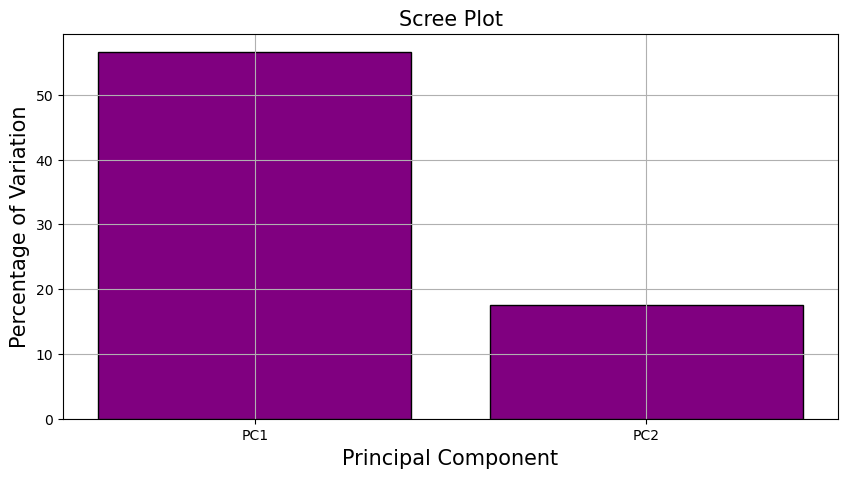

In [13]:
plt.figure(figsize = (10,5))

princ_comp = ["PC" + str(x) for x in range(1,3)]

plt.bar(x = range(1,3), height = per_var, tick_label = princ_comp,color='purple',edgecolor='black')
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [14]:
pca_trans = pd.DataFrame(pca_trans, columns = princ_comp)
pca_trans

PC1       PC2
0    -2.156082 -0.540198
1    -2.357428  0.645539
2    -1.826432  0.178160
3    -2.229754  0.457802
4    -2.601428  0.400875
...        ...       ...
5468  3.128479  2.276914
5469 -2.659402  2.671059
5470  0.003533 -0.668908
5471 -1.115015 -1.506537
5472 -2.748362  2.816302

[5473 rows x 2 columns]

In [15]:
df_components = pd.DataFrame(pca_data.components_,columns=col)
df_components

height    length      area     eccen   p_black     p_and   mean_tr  \
0  0.215956  0.397659  0.413466  0.286626 -0.151589 -0.191485  0.004121   
1  0.131991  0.022851  0.040840 -0.009288  0.662769  0.270625  0.652457   

   blackpix  blackand  wb_trans  
0  0.393671  0.409343  0.399900  
1  0.188451  0.078353 -0.021194

Text(0, 0.5, 'Principal Component 2')

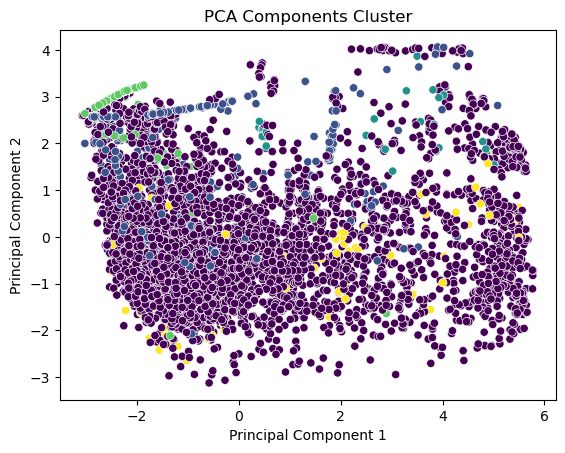

In [21]:
import seaborn as sns
sns.scatterplot(data = pca_trans, x=pca_trans.iloc[:,0], y=pca_trans.iloc[:,1],c=y)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('Principal Component 1')
# Set y-axis label
plt.ylabel('Principal Component 2')


In [22]:
X = pca_trans

y = df['y']

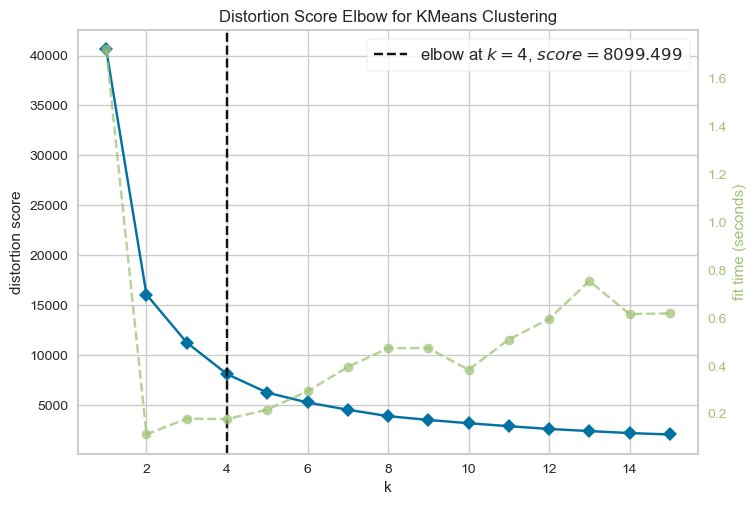

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from  yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

km=KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,16))

visualizer.fit(X)
visualizer.show()

In [27]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=1000, n_init=10).fit(X)

cluster = kmeans.predict(X)
pca_trans["Cluster"]= cluster

Text(0, 0.5, 'Principal Component 2')

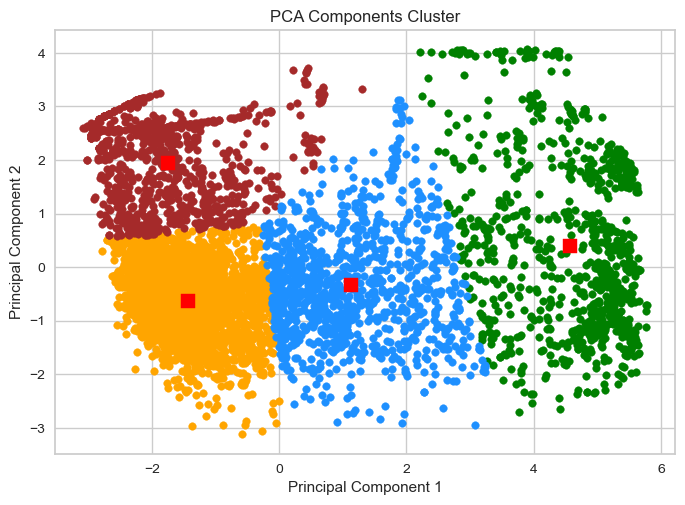

In [30]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['green','orange','brown','dodgerblue','pink','purple', 'blue', 'yellow']

for label, color in zip(labels, colors):
    index = pca_trans["Cluster"]==label
    plt.scatter(pca_trans.loc[index, "PC1"],
                pca_trans.loc[index, "PC2"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('Principal Component 1')
# Set y-axis label
plt.ylabel('Principal Component 2')


In [44]:
# Non linear Dimensionality reduction using KernalPCA with kernal as rbf

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 5)
X_kpca = kpca.fit_transform(df1)  

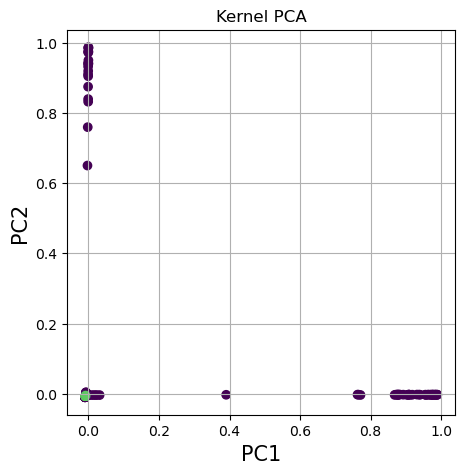

In [45]:
# 2 component Kernel PCA
plt.figure(figsize=(5,5))
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],c=y)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.grid();

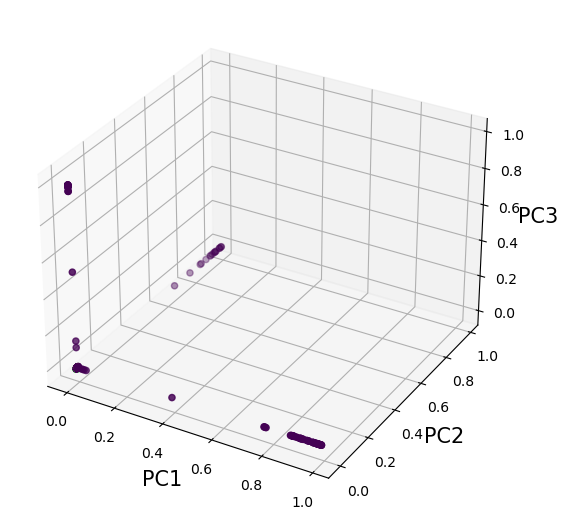

In [46]:
# 3 component Kernel PCA
fig= plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=y)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)
plt.show()